<h1 style="background-color:rgb(21, 131, 85); font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
<b>labeled dataset collected from twitter (Hate Speech)</b>
</h1>


**Objective**

- classify tweets containing hate speech from other tweets. <br>
0 : No hate speech <br>
1 : Contains hate speech <br>


**Evaluation metric**
- macro f1 score used for unbalanced datasets

# `00` **Import used libraries**

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet','punkt_tab'])


[nltk_data] Downloading package stopwords to C:\Users\Omar
[nltk_data]     Elgema3y\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Omar
[nltk_data]     Elgema3y\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Omar
[nltk_data]     Elgema3y\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [256]:
import spacy
from gensim.models import Word2Vec, KeyedVectors, FastText
import gensim
import gensim.downloader as api

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout , BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import eli5

# `01` **Load Dataset**

###### Note: search how to load the data from tsv file

In [3]:
df = pd.read_csv("Hate Speech.tsv", sep= "\t", index_col='id')
df.head(100)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦


In [50]:
def highlight_col(x, df):
    mask = df['label'] == 0 
    mask2 = df['label'] == 1  
    x = pd.DataFrame('', index=df.index, columns=df.columns)
    x.loc[mask] = 'background-color: #47af47'
    x.loc[mask2] = 'background-color: #ff5151'
    return x    

pd.set_option('display.max_colwidth', 100000)
positive_samples = df[df['label'] == 0].sample(5)
negative_samples = df[df['label'] == 1].sample(5)
df_tmp = pd.concat([positive_samples, negative_samples])
df_tmp.style.apply(lambda x: highlight_col(x, df_tmp), axis=None)

,label,tweet
id,,
2273,0,happy friday angels !! #deckedupbeauties #tgif #friday #goodmorning #flowers #yellowâ¦
28125,0,dads paying for me and scott to go on a cruise. cool. #honeymoon
29164,0,color run 2016â¤ï¸ððð #thecolorrun #color #pay #people #denmark #conce #running #summer
8159,0,"@user me, i need another tattoo, but we can't because i'm from perÃº ."
15883,0,i am marvelous.#i_am #positive #affirmation
16932,1,"@user if you are one of the 64.2 mil #americans who rejected , #bigotry & #hatred fly your flag half mast on jan.â¦"
24028,1,@user - special message for @user ! it's not your land either .. #trump #trumpsamerica #day1â¦
24646,1,"he must think people are really stupid; otherwise, why would he lie so blatantly? should neve be tolerateâ¦"
21257,1,who pulled his chain?? #stoptalking you sob! #auspol


In [51]:
df.count()

label    31535
tweet    31535
dtype: int64

# `02` **Data splitting**

- It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

In [57]:
X = df['tweet']
y = df['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25228,), (6307,), (25228,), (6307,))

# `03` **EDA on training data**

- check NaNs

In [59]:
df.isna().sum()

label    0
tweet    0
dtype: int64

- check duplicates

In [60]:
df.duplicated().sum()

2404

In [61]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

- show a representative sample of data texts to find out required preprocessing steps

In [65]:
df["tweet"].head(10)

id
1                                               @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
2                          @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
3                                                                                                                                 bihday your majesty
4                                                                #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦
5                                                                                                              factsguide: society now    #motivation
6                                  [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7                                                                           @user camping tomorro

- Lowercase

- Remove usernames (@user)

- Remove numbers

- Remove emojis

- Remove URLs

- Remove punctuation

- Remove stopwords


- check dataset balancing

In [66]:
df['label'].value_counts()

label
0    27142
1     1989
Name: count, dtype: int64

In [67]:
y_train.value_counts()

label
0    23458
1     1770
Name: count, dtype: int64

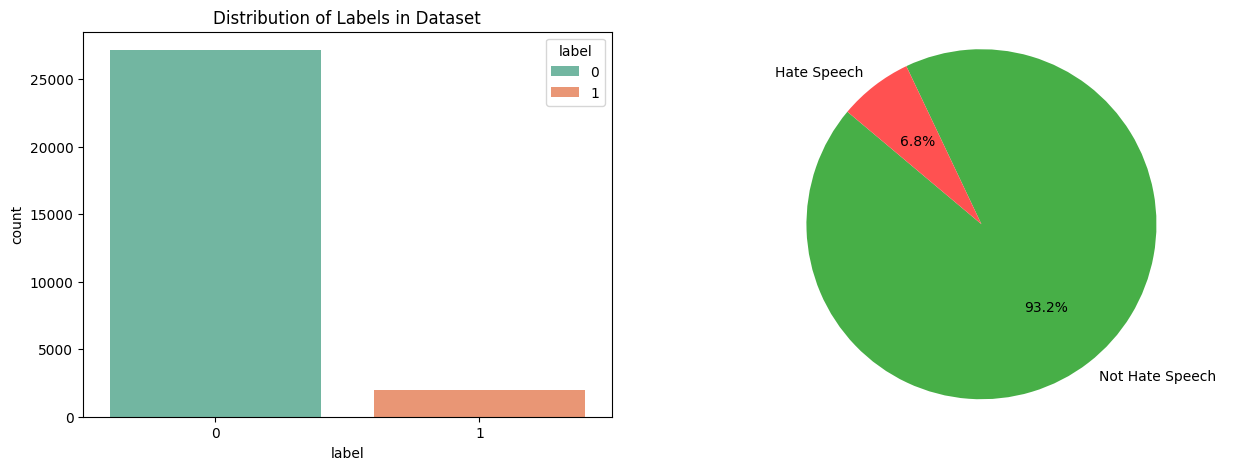

In [89]:
plt.figure(figsize=(15,5))

plt.subplot(1,2, 1)
sns.countplot(x='label', data=df, hue='label', palette='Set2')
plt.title('Distribution of Labels in Dataset')
plt.subplot(1,2, 2)
plt.pie(df['label'].value_counts(), labels=['Not Hate Speech', 'Hate Speech'], autopct='%1.1f%%', startangle=140, colors=['#47af47', '#ff5151'])
plt.axis('equal')
plt.show()

- imbalanced dataset

# `04` **Cleaning and Preprocessing**

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(nltk.corpus.stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        
        # Add any initialization code here
    
    def fit(self, X, y=None):
        # Add code for fitting the transformer here
        return X
    
    def clean_text(self, text):
        # Add code for cleaning the text here
        text = text.lower()
        text = re.sub(r"\d+", "", text)  # remove numbers
        text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove URLs
        text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
        text = re.sub(r"\s+", " ", text)  # remove extra spaces
        text = re.sub(r"@\w+", "", text)  # remove mentions
        text = text.encode('ascii', 'ignore').decode('ascii') # remove emojis and special characters
        text = word_tokenize(text)
        text = [word for word in text if word not in self.stop_words]
        text = [self.lemmatizer.lemmatize(word) for word in text]
        return text

    def transform(self, X):
        # Add code for transforming the data here
        transformed_X = X.copy()  # Example: Just copying the data
        transformed_X = transformed_X.apply(self.clean_text)  # Apply the cleaning function to each row
        transformed_X = transformed_X.apply(lambda x: ' '.join(x))
        return transformed_X
    
    def fit_transform(self, X, y=None):
        # This function combines fit and transform
        self.fit(X, y)
        return self.transform(X)

# `05` **Traditional Modeling**
- **TD-IDF(Unigram - Bigram)**
- **Bag of words (BOW)**

## **TDIDF Unigram**

In [91]:
model = LogisticRegression()

pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', TfidfVectorizer()),
    ('model', model),
])

In [92]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5864
           1       0.87      0.28      0.43       443

    accuracy                           0.95      6307
   macro avg       0.91      0.64      0.70      6307
weighted avg       0.94      0.95      0.93      6307



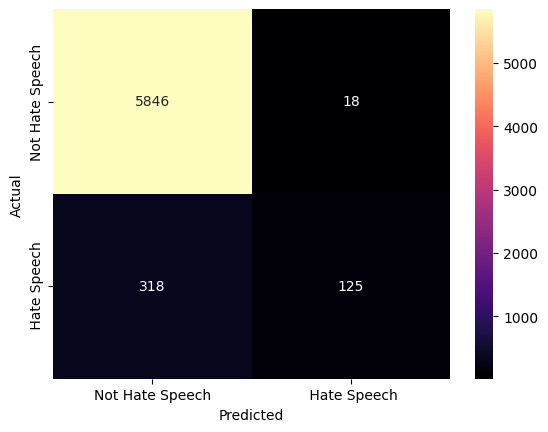

In [93]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', xticklabels=['Not Hate Speech', ' Hate Speech'], yticklabels=['Not Hate Speech', ' Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Evaluation

**Evaluation metric:**
macro f1 score

Macro F1 score is a useful metric in scenarios where you want to evaluate the overall performance of a multi-class classification model, **particularly when the classes are imbalanced**

![Calculation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d934e82c1195cdf3c60_macro-f1.webp)

In [94]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")


Macro F1 Score: 0.6993431708266604


## **TDIDF Bigram**

In [18]:
model = LogisticRegression()

pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', TfidfVectorizer(ngram_range=(1,2))),
    ('model', model),
])

In [19]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5880
           1       0.90      0.27      0.41       427

    accuracy                           0.95      6307
   macro avg       0.92      0.63      0.69      6307
weighted avg       0.95      0.95      0.93      6307



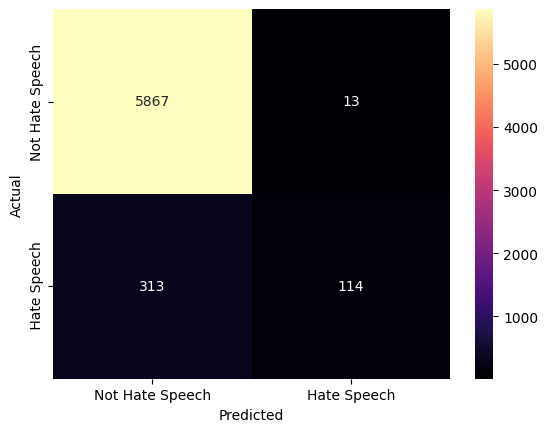

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', xticklabels=['Not Hate Speech', 'Hate Speech'], yticklabels=['Not Hate Speech', ' Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.6922604187246679


- **try N-gram (1,3)**

In [22]:
model = LogisticRegression()

pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', TfidfVectorizer(ngram_range=(1,3))),
    ('model', model),
])

In [23]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5880
           1       0.87      0.23      0.36       427

    accuracy                           0.95      6307
   macro avg       0.91      0.61      0.67      6307
weighted avg       0.94      0.95      0.93      6307



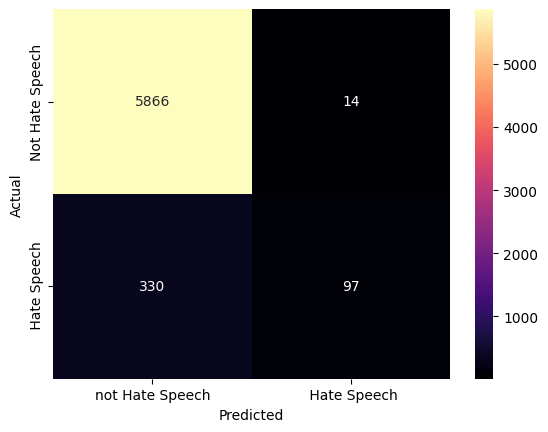

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', xticklabels=['not Hate Speech', ' Hate Speech'], yticklabels=['Not Hate Speech', ' Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.666054270906317


- **try N-gram (2,2)**

In [26]:
model = LogisticRegression()

pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', TfidfVectorizer(ngram_range=(2,2))),
    ('model', model),
])

In [27]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5880
           1       0.87      0.13      0.22       427

    accuracy                           0.94      6307
   macro avg       0.91      0.56      0.59      6307
weighted avg       0.94      0.94      0.92      6307



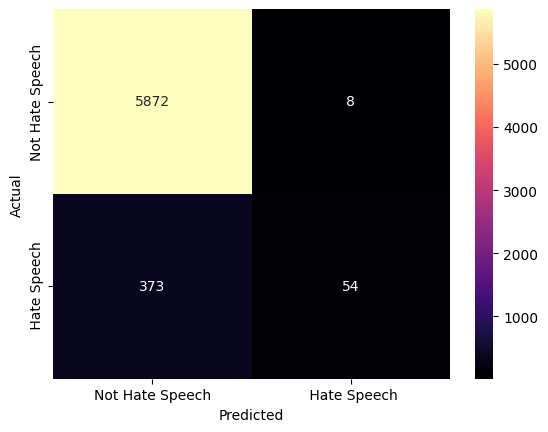

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', xticklabels=['Not Hate Speech', ' Hate Speech'], yticklabels=['Not Hate Speech', ' Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.5947181076465752


## **Bag of Words**

In [30]:
model = LogisticRegression()

pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', CountVectorizer()),
    ('model', model),
])

In [31]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5880
           1       0.87      0.52      0.65       427

    accuracy                           0.96      6307
   macro avg       0.92      0.76      0.82      6307
weighted avg       0.96      0.96      0.96      6307



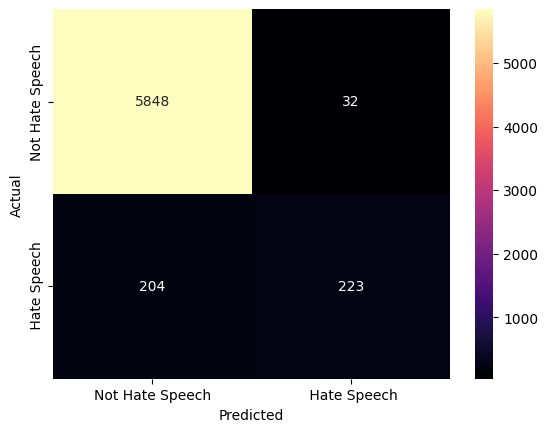

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', xticklabels=['Not Hate Speech', ' Hate Speech'], yticklabels=['Not Hate Speech', ' Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.817090099026448


In [34]:
model = LogisticRegression()

pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', CountVectorizer(ngram_range=(1,2))),
    ('model', model),
])

In [35]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5880
           1       0.91      0.52      0.66       427

    accuracy                           0.96      6307
   macro avg       0.94      0.76      0.82      6307
weighted avg       0.96      0.96      0.96      6307



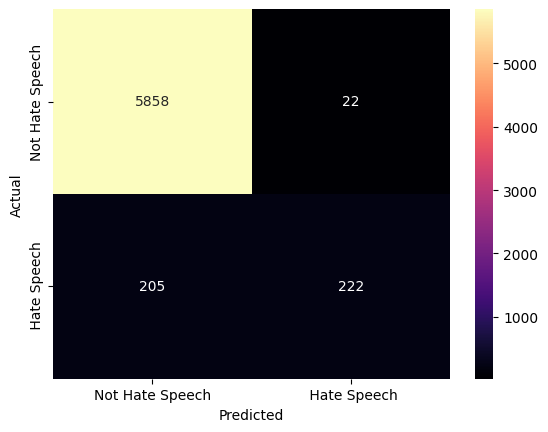

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', xticklabels=['Not Hate Speech', ' Hate Speech'], yticklabels=['Not Hate Speech', ' Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.8213460035516442


In [38]:
model = LogisticRegression()

pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', CountVectorizer(ngram_range=(1,3))),
    ('model', model),
])

In [39]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5880
           1       0.93      0.51      0.66       427

    accuracy                           0.96      6307
   macro avg       0.95      0.75      0.82      6307
weighted avg       0.96      0.96      0.96      6307



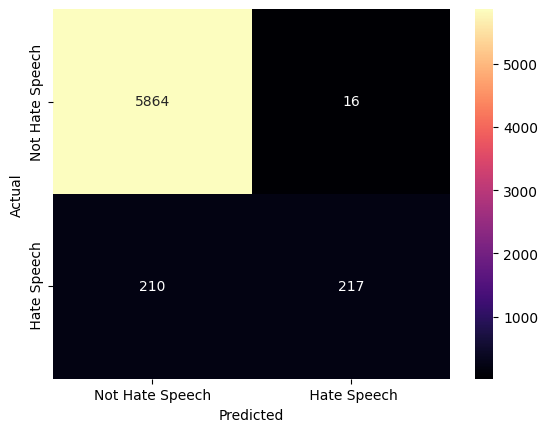

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', xticklabels=['Not Hate Speech', ' Hate Speech'], yticklabels=['Not Hate Speech', ' Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.819334975993835


### Conclusion and final results


- **BOW is better than Tfidf**

In [96]:
model = LogisticRegression()
vectorizer = CountVectorizer(ngram_range=(1,2))
pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', vectorizer),
    ('model', model),
])

In [47]:
grid = {'model__C': [0.01, 0.1, 1],
        'model__penalty': ['l1', 'l2', 'elasticnet'],
        'model__solver': ['liblinear', 'saga']}    

grid_search = GridSearchCV(pipeline, grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
print(f"Best Score: {best_score}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

c:\Users\Omar Elgema3y\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Omar Elgema3y\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Omar Elgema3y\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

{'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Score: 0.800768739695527


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5880
           1       0.84      0.54      0.66       427

    accuracy                           0.96      6307
   macro avg       0.90      0.76      0.82      6307
weighted avg       0.96      0.96      0.96      6307



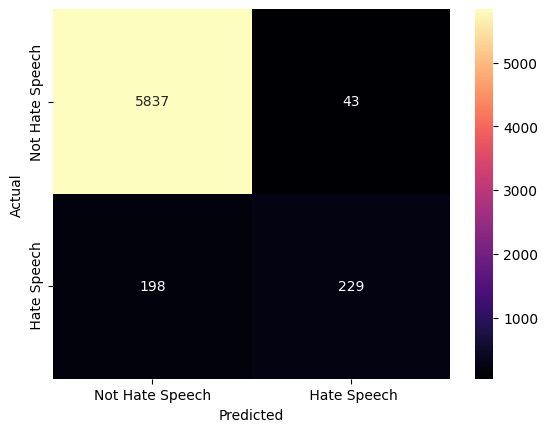

Macro F1 Score: 0.8174975701154518


In [48]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', xticklabels=['Not Hate Speech', ' Hate Speech'], yticklabels=['Not Hate Speech', ' Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")

# `06` **Advanced Modeling**
- **Word2Vec**
- **Glove**
- **Fasttext**
- **CNN**

In [ ]:
class word2vec(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='en_core_web_md'):
        self.model_name = model_name
        self.nlp = spacy.load(model_name)

    def fit(self, X, y=None):
        return X

    def transform(self, X):
        embeddings = np.zeros((len(X), 300))
        for i, doc in enumerate(self.nlp.pipe(X)):
            embeddings[i, :] = doc.vector
        return embeddings

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [116]:
pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', word2vec()),
    ('model', LogisticRegression()),
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5864
           1       0.66      0.31      0.43       443

    accuracy                           0.94      6307
   macro avg       0.80      0.65      0.70      6307
weighted avg       0.93      0.94      0.93      6307



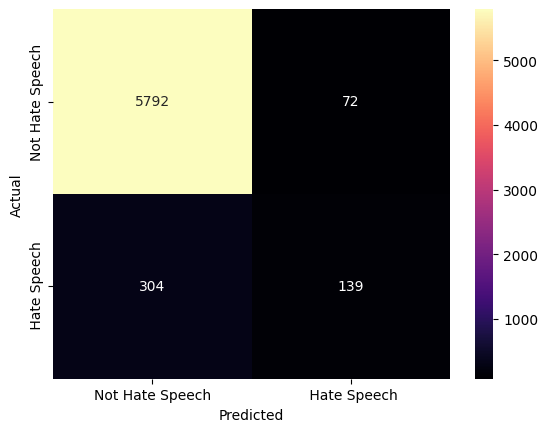

In [117]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', xticklabels=['Not Hate Speech', ' Hate Speech'], yticklabels=['Not Hate Speech', ' Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [118]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.6968191627545437


- **Glove**

In [95]:
glove_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
class Glove(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = api.load("glove-wiki-gigaword-100")

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # empty array for embeddings
        embeddings = np.zeros((len(X), 100))

        for i, doc in enumerate(X):
            words = doc.split() # Tokenize the document
            doc_vector = np.zeros(100)
            valid_words = 0
            for word in words:
                try:
                    word_vector = self.model[word] 
                    doc_vector += word_vector
                    valid_words += 1
                except KeyError:
                    continue
            if valid_words > 0:
                doc_vector /= valid_words
            embeddings[i, :] = doc_vector
        return embeddings

    def fit_transform(self, X, y=None):
        return self.transform(X)

In [123]:
pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', Glove()),
    ('model', LogisticRegression()),
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5864
           1       0.64      0.29      0.40       443

    accuracy                           0.94      6307
   macro avg       0.79      0.64      0.68      6307
weighted avg       0.93      0.94      0.93      6307



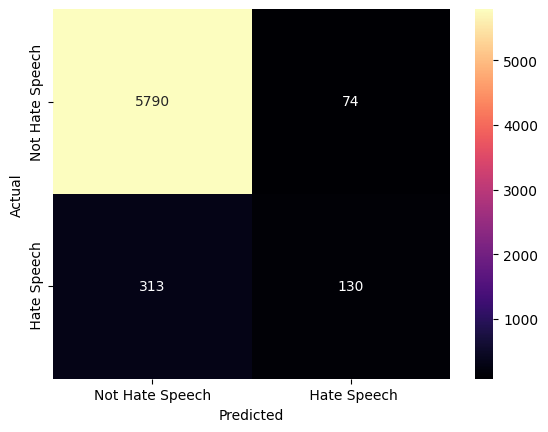

In [124]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', xticklabels=['Not Hate Speech', ' Hate Speech'], yticklabels=['Not Hate Speech', ' Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [125]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.6847578910008707


- **CNN**

In [ ]:
max_words = 10000
max_len = 100

X_train = X_train.astype(str).tolist()
X_test = X_test.astype(str).tolist()

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
epochs = 10
batch_size = 64
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
class_weight = { 0:1 , 1:2 } # Adjust class weights to handle class imbalance

In [258]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    Conv1D(128, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stop], class_weight=class_weight)

Epoch 1/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.7832 - loss: 0.4857 - val_accuracy: 0.9437 - val_loss: 0.1705
Epoch 2/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9790 - loss: 0.1061 - val_accuracy: 0.9546 - val_loss: 0.1330
Epoch 3/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9932 - loss: 0.0415 - val_accuracy: 0.9483 - val_loss: 0.1839
Epoch 4/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9974 - loss: 0.0179 - val_accuracy: 0.9520 - val_loss: 0.2184
Epoch 5/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9979 - loss: 0.0117 - val_accuracy: 0.9560 - val_loss: 0.1956
Epoch 6/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9972 - loss: 0.0122 - val_accuracy: 0.9348 - val_loss: 0.2513
Epoch 7/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9962 - loss: 0.0155 - val_accuracy: 0.9536 - val_loss: 0.2002


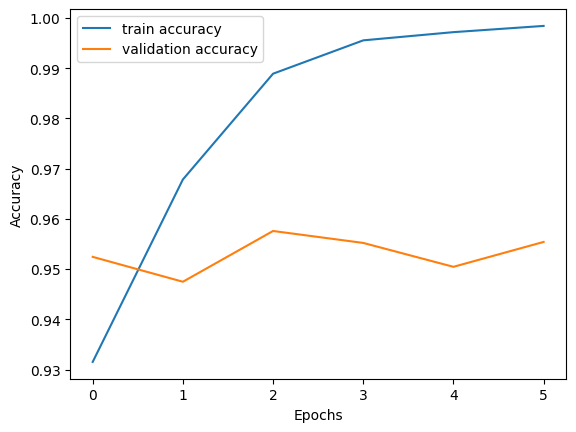

In [253]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

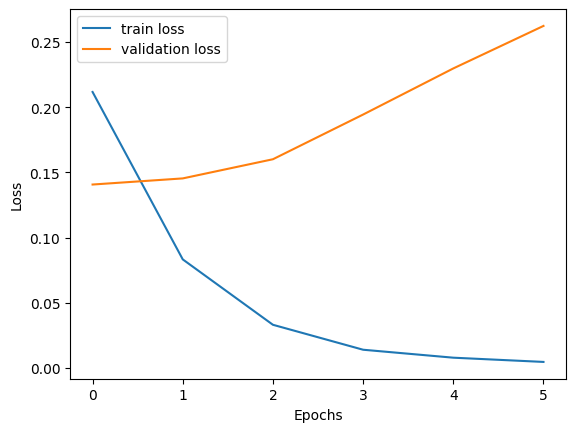

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [260]:
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.49).astype(int)
print(classification_report(y_test, y_pred))

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5864
           1       0.11      0.00      0.01       443

    accuracy                           0.93      6307
   macro avg       0.52      0.50      0.49      6307
weighted avg       0.87      0.93      0.90      6307



- huge bias to 0 class